In [8]:
import geopandas as gpd
import geojson
import pandas as pd
import glob
import operator
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
column_names = ['cellId', 'Time Interval', 'Country code', 'SMS-in activity', 'SMS-out activity', 'Call-in activity', 'Call-out activity', 'Internet traffic activity']

dataverse_files = glob.glob('dataverse_files/*.txt')
total_traffic_region = [0] * 10000
i = 0

df=pd.DataFrame(columns=['cellId', 'Internet traffic activity'])
for file in dataverse_files:
    df_each = pd.read_csv(file, delimiter='\t', names=column_names)
    df_sum = df_each.groupby('cellId')['Internet traffic activity'].sum()
    total_traffic_region = list(map(operator.add, total_traffic_region, df_sum))
result = np.array(total_traffic_region)

df['cellId'] = range(1, 9999)
df['Internet traffic activity'] = total_traffic_region

max_traffic_index = np.argmax(result)
cell_id = df['cellId'].iloc[max_traffic_index]

print(cell_id)
print(df)




5161
      cellId  Internet traffic activity
0          1               92992.666580
1          2               93368.388389
2          3               93768.329391
3          4               91904.381588
4          5               83630.697355
...      ...                        ...
9993    9994              283240.725794
9994    9995              330022.266035
9995    9996              351950.570011
9996    9997              289363.946873
9997    9998              260308.967216

[9998 rows x 2 columns]


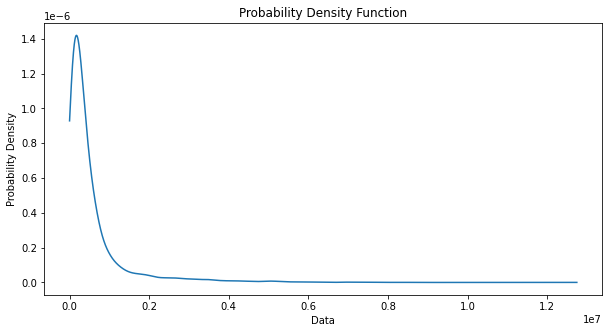

In [4]:
plt.figure(figsize=(10, 5))

#Probability density function
#Estimate of the pdf using the gaussian kernel density estimation
kde = gaussian_kde(result)

x = np.linspace(min(result), max(result), 10000)

#pdf values for each x
y = kde.evaluate(x)

#plot the pdf
plt.plot(x, y)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')

plt.show()


In [10]:
# a figure of the time series of network traffic during the first two weeks at three areas, namely (i) the area with
# the highest total traffic during the two-month period,
# (ii) the area with Square id 4159, and (iii) the area
# with Square id 4556

start_date = '2013-11-01'
end_date = '2013-11-14'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

column_names = ['cellId', 'Time Interval', 'Country code', 'SMS-in activity', 'SMS-out activity', 'Call-in activity', 'Call-out activity', 'Internet traffic activity']

i = 0
file_name = []
for file in os.listdir('dataverse_files'):
    if i <= 13:
        file_name.append(file)
        i = i+1
    else: break

total_traffic_high =[]
total_traffic_4159 = []
total_traffic_4556 = []
df = pd.DataFrame({})
for file in file_name:
    df_file = pd.read_csv('dataverse_files\\'+file, delimiter='\t', names=column_names) 
    df = df.append(df_file)
df_grouped = df.groupby('cellId')
# #(i)
#     reg_high = df_file.get_group(cell_id)['Internet traffic activity'].sum()
#     total_traffic_high.append(reg_high)
    
# #(ii)
#     reg_4159 = df_file.get_group(4159)['Internet traffic activity'].sum()
#     total_traffic_4159.append(reg_4159)

# #(iii)
#     reg_4556 = df_file.get_group(4556)['Internet traffic activity'].sum()
#     total_traffic_4556.append(reg_4556)





<AxesSubplot:xlabel='Time Interval', ylabel='Internet traffic activity'>

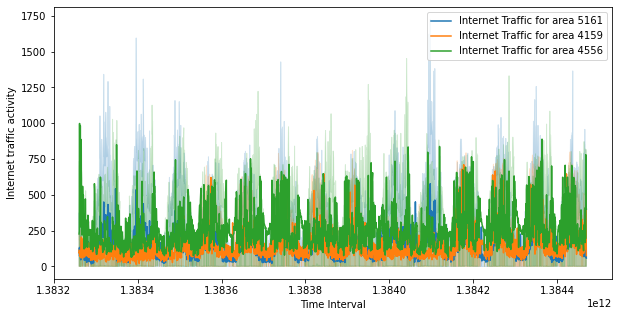

In [18]:
plt.figure(figsize=(10, 5))

traffic_4159 = df_grouped.get_group(4159)
traffic_5161 = df_grouped.get_group(5161)
traffic_4556 = df_grouped.get_group(4556)

sns.lineplot(data=traffic_5161, x='Time Interval', y='Internet traffic activity', label='Internet Traffic for area 5161')
sns.lineplot(data=traffic_4159, x='Time Interval', y='Internet traffic activity', label='Internet Traffic for area 4159')
sns.lineplot(data=traffic_4556, x='Time Interval', y='Internet traffic activity', label='Internet Traffic for area 4556')

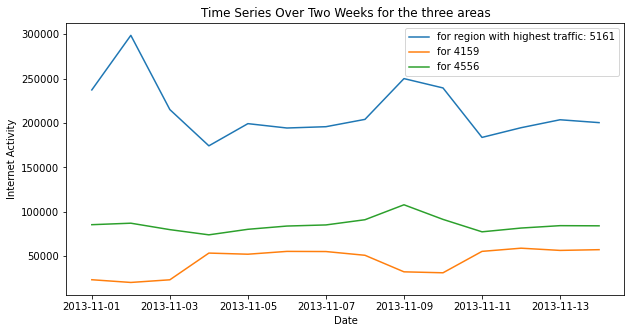

In [7]:

plt.figure(figsize=(10, 5))
# time series 4159
plt.plot(date_range, total_traffic_high, label = 'for region with highest traffic: 5161')
plt.plot(date_range, total_traffic_4159, label = 'for 4159')
plt.plot(date_range, total_traffic_4556, label = 'for 4556')
plt.xlabel('Date')
plt.ylabel('Internet Activity')
plt.title('Time Series Over Two Weeks for the three areas')
plt.legend()
plt.show()